In [1]:
import cv2,os
data_path='DATASET'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'Test': 0, 'Train': 1}
['Test', 'Train']
[0, 1]


In [2]:
data_path='DATASET/Train'
classes_path=os.listdir(data_path)
classesf=os.listdir(data_path)
print(classesf)
labels_classes=[i for i in range(len(classesf))]
print(labels_classes)

['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [3]:
data_path='DATASET'

In [4]:
label_classes_dict=dict(zip(classesf,labels_classes))

In [5]:
#print(labels_classes)
#print(categories)
print(label_classes_dict)

{'0': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}


In [6]:
import numpy as np

In [7]:
img_size=128
data=[]
target=[]
c=0
minValue = 70
for category in categories:
    
    cat_path=os.path.join(data_path,category)
    print(cat_path)
    cat_names=os.listdir(cat_path)
    print(cat_names)
    for classes in cat_names:
        folder_path=os.path.join(data_path,category,classes)
        print(folder_path)
        img_names=os.listdir(folder_path)
        #print(img_names)
        for img_name in img_names:
            #print(img_name)
            img_path=os.path.join(folder_path,img_name)
            img=cv2.imread(img_path)
            
            try:
                gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
                blur = cv2.GaussianBlur(gray,(5,5),2)
                th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
                ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                #res=np.array(res)
                #print(type(res))
            #Converting the image into gray scale
                resized=cv2.resize(res,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
                data.append(resized)
                #print(data)
                target.append(label_classes_dict[classes])
            except Exception as e:
                print('Exception:',e)
            
            
        
        

DATASET\Test
['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
DATASET\Test\0
DATASET\Test\A
DATASET\Test\B
DATASET\Test\C
DATASET\Test\D
DATASET\Test\E
DATASET\Test\F
DATASET\Test\G
DATASET\Test\H
DATASET\Test\I
DATASET\Test\J
DATASET\Test\K
DATASET\Test\L
DATASET\Test\M
DATASET\Test\N
DATASET\Test\O
DATASET\Test\P
DATASET\Test\Q
DATASET\Test\R
DATASET\Test\S
DATASET\Test\T
DATASET\Test\U
DATASET\Test\V
DATASET\Test\W
DATASET\Test\X
DATASET\Test\Y
DATASET\Test\Z
DATASET\Train
['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
DATASET\Train\0
DATASET\Train\A
DATASET\Train\B
DATASET\Train\C
DATASET\Train\D
DATASET\Train\E
DATASET\Train\F
DATASET\Train\G
DATASET\Train\H
DATASET\Train\I
DATASET\Train\J
DATASET\Train\K
DATASET\Train\L
DATASET\Train\M
DATASET\Train\N
DATASET\Train\O
DATASET\Train\P
DATASET\Train\Q
DATASET\

In [8]:
datanp=np.array(data)

In [9]:
datanp.shape

(17113, 128, 128)

In [10]:
targetnp=np.array(target)

targetnp.shape

(17113,)

In [11]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [12]:
new_target.shape

(17113, 27)

In [13]:
np.save('data_img',data)
np.save('target',new_target)

In [14]:
data=np.load('data_img.npy')
target=np.load('target.npy')

In [15]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.2)

In [17]:
from keras.models import Sequential
from keras.layers import Convolution2D

from keras.layers import AveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
sz = 128


classifier = Sequential()

# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 1), activation='relu'))
classifier.add(AveragePooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(AveragePooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=27, activation='softmax')) # softmax for more than 2

# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2


# Step 2 - Preparing the train/test data and training the model
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
average_pooling2d (AveragePo (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
average_pooling2d_1 (Average (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3686528   
_________________________________________________________________
dropout (Dropout)            (None, 128)              

In [18]:
from keras.callbacks import ModelCheckpoint

In [21]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=classifier.fit(train_data,train_target,shuffle=True,epochs=30,callbacks=[checkpoint],validation_split=0.3)

Epoch 1/30
300/300 [==============================] - 93s 312ms/step - loss: 0.0289 - accuracy: 0.9910 - val_loss: 0.0099 - val_accuracy: 0.9976
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/30
300/300 [==============================] - 95s 317ms/step - loss: 0.0254 - accuracy: 0.9923 - val_loss: 0.0078 - val_accuracy: 0.9983
INFO:tensorflow:Assets written to: model-002.model\assets
Epoch 3/30
300/300 [==============================] - 92s 308ms/step - loss: 0.0211 - accuracy: 0.9932 - val_loss: 0.0099 - val_accuracy: 0.9985
Epoch 4/30
300/300 [==============================] - 96s 322ms/step - loss: 0.0261 - accuracy: 0.9927 - val_loss: 0.0116 - val_accuracy: 0.9978
Epoch 5/30
300/300 [==============================] - 95s 316ms/step - loss: 0.0303 - accuracy: 0.9912 - val_loss: 0.0071 - val_accuracy: 0.9988
INFO:tensorflow:Assets written to: model-005.model\assets
Epoch 6/30
300/300 [==============================] - 94s 314ms/step - loss: 0.0257 - accuracy: 0.991

In [22]:
print(classifier.evaluate(test_data,test_target))

107/107 [==============================] - 9s 80ms/step - loss: 0.0025 - accuracy: 0.9994
[0.0024562838952988386, 0.9994156956672668]


In [23]:
N = 20
H=history

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('evaluation.png')

NameError: name 'plt' is not defined

In [24]:
# serialize the model to disk
print("[INFO] saving mask detector model...")
classifier.save('classifier.h5')
print("Done !")

[INFO] saving mask detector model...
Done !


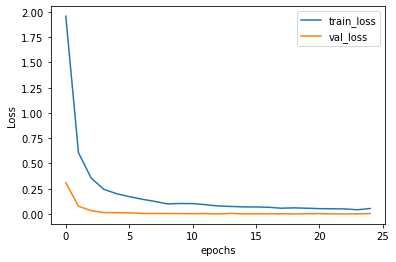

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train_loss','val_loss'], loc=0)
plt.show()

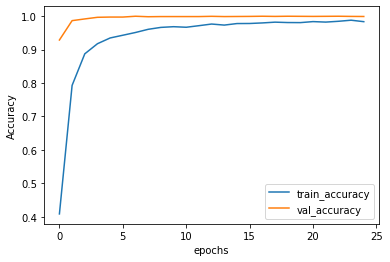

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train_accuracy','val_accuracy'], loc=0)
plt.show()